#tomasz.krzywicki@uwm.edu.pl

# 1. Heart Failure Prediction Dataset
#### 11 clinical features for predicting heart disease events
#### A supervised ML problem

Description of attributes
- Age - age of the patient in years
- Sex - sex of the patient: M = Male, F = Female
- ChestPainType - chest pain type: TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic
- RestingBP - resting blood pressure in mm Hg
- Cholesterol - serum cholesterol in mm/dl
- FastingBS - fasting blood sugar: 1: if FastingBS > 120 mg/dl, 0: otherwise
- RestingECG - resting electrocardiogram results: Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
- MaxHR - maximum heart rate achieved: Numeric value between 60 and 202
- ExerciseAngina - exercise-induced angina: Y: Yes, N: No
- Oldpeak - oldpeak = ST [Numeric value measured in depression]
- ST_Slope - the slope of the peak exercise ST segment: Up: upsloping, Flat: flat, Down: downsloping
- HeartDisease - output class / target: 1: heart disease, 0: Normal

The Problem:
- binary classification problem,
- Predition based on the target variable HeartDisease
- build a variety of Classification models and compare the models giving the best prediction on Heart Disease.

Target variable is the variable that should be the output. 
Our target variable is HeartDisease in the contex of determining whether anybody is likely to get hearth disease based on the input parameters like gender, age and various test results or not.

In [1]:
# import libraries

# 1. to handle the data
import numpy as np
import pandas as pd  

# 2. To Viusalize the data
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px

# 3. To preprocess the data
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 4. Machine Learning
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier

# 5. Metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix,classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,roc_auc_score

# 6. Ignore warnings
# import warnings
# warnings.filterwarnings('ignore')


### a) Import dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [158]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

There is 918 observation and 12 columns in the dataset


In [159]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [160]:
df.describe(include='object').T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [161]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### b) Exploring the data

The Examination of Target Variable

HeartDisease
1    508
0    410
Name: count, dtype: int64


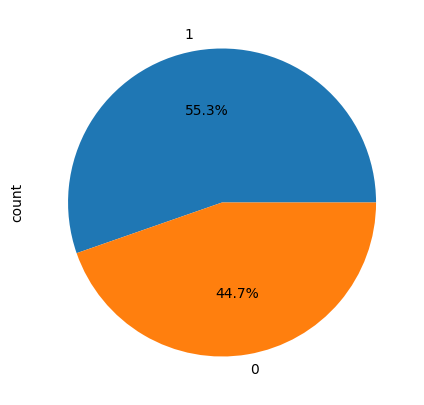

In [162]:
print(df["HeartDisease"].value_counts())
df["HeartDisease"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(5,5));

Target labels are 410 versus 508 thus there is no imbalance in the data.

In [14]:
df[df['HeartDisease']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,410.000000,50.551220,9.444915,28.000000,43.000000,51.000000,57.000000,76.000000
RestingBP,410.000000,130.180488,16.499585,80.000000,120.000000,130.000000,140.000000,190.000000
Cholesterol,410.000000,227.121951,74.634659,0.000000,197.250000,227.000000,266.750000,564.000000
FastingBS,410.000000,0.107317,0.309894,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,410.000000,148.151220,23.288067,69.000000,134.000000,150.000000,165.000000,202.000000
Oldpeak,410.000000,0.408049,0.699709,-1.100000,0.000000,0.000000,0.600000,4.200000
HeartDisease,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
df[df['HeartDisease']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,508.000000,55.899606,8.727056,31.000000,51.000000,57.000000,62.000000,77.000000
RestingBP,508.000000,134.185039,19.828685,0.000000,120.000000,132.000000,145.000000,200.000000
Cholesterol,508.000000,175.940945,126.391398,0.000000,0.000000,217.000000,267.000000,603.000000
FastingBS,508.000000,0.334646,0.472332,0.000000,0.000000,0.000000,1.000000,1.000000
MaxHR,508.000000,127.655512,23.386923,60.000000,112.000000,126.000000,144.250000,195.000000
Oldpeak,508.000000,1.274213,1.151872,-2.600000,0.000000,1.200000,2.000000,6.200000
HeartDisease,508.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


By looking at the numbers above we can say that on average the patients with Heart Disease:  
-are older  
-have a higher resting blood pressure  
-have higher cholesterol levels  
-have a daily maximum heart rate lower

### General Overview / Distribtion showing relationships between patients who have heart disease, and those that do not.

checking how the distribution of numeric variables is different for those that have heart disease, and those that do not.

In [17]:
hd_yes = df[df['HeartDisease'] == 1]
hd_no = df[df['HeartDisease'] == 0]

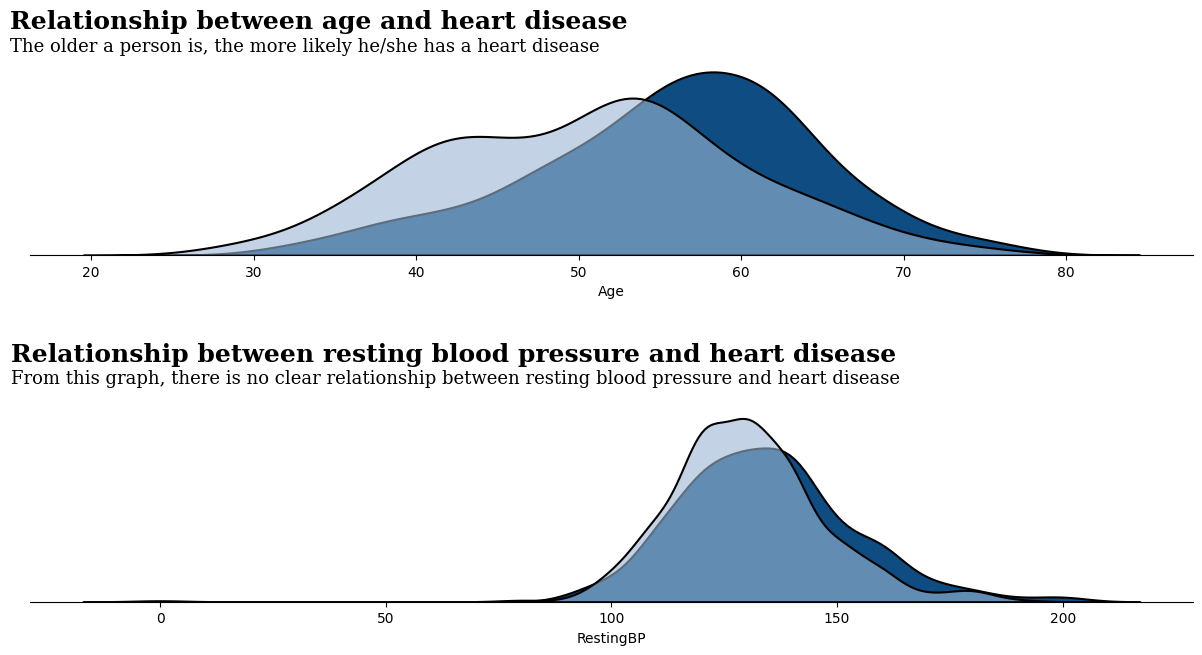

In [18]:
fig=plt.figure(figsize=(15,7),facecolor='white')

ax=[None for i in range(2)]
gs=fig.add_gridspec(2,1)
gs.update(wspace=0, hspace=0.8)

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[1,0])

ax[0].text(15,0.06,'Relationship between age and heart disease',fontsize=18,fontweight='bold', fontfamily='serif')
ax[0].text(15,0.054,'The older a person is, the more likely he/she has a heart disease',fontsize=13,fontweight='light', fontfamily='serif')
ax[1].text(-33,0.033,'Relationship between resting blood pressure and heart disease',fontsize=18,fontweight='bold', fontfamily='serif')
ax[1].text(-33,0.030,'From this graph, there is no clear relationship between resting blood pressure and heart disease',fontsize=13,fontweight='light', fontfamily='serif')

sns.kdeplot(hd_yes,x='Age',ax=ax[0],fill=True,color='#0f4c81',alpha=1,linewidth=1.5, ec='black')
sns.kdeplot(hd_no,x='Age',ax=ax[0],fill=True,color='#9bb7d4',alpha=0.6,linewidth=1.5, ec='black')
sns.kdeplot(hd_yes,x='RestingBP',ax=ax[1],fill=True,color='#0f4c81',alpha=1,linewidth=1.5, ec='black')
sns.kdeplot(hd_no,x='RestingBP',ax=ax[1],fill=True,color='#9bb7d4',alpha=0.6,linewidth=1.5, ec='black')

for i in range(2):
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)

checking the relationships for other variables between patients who have heart disease, and those that do not.

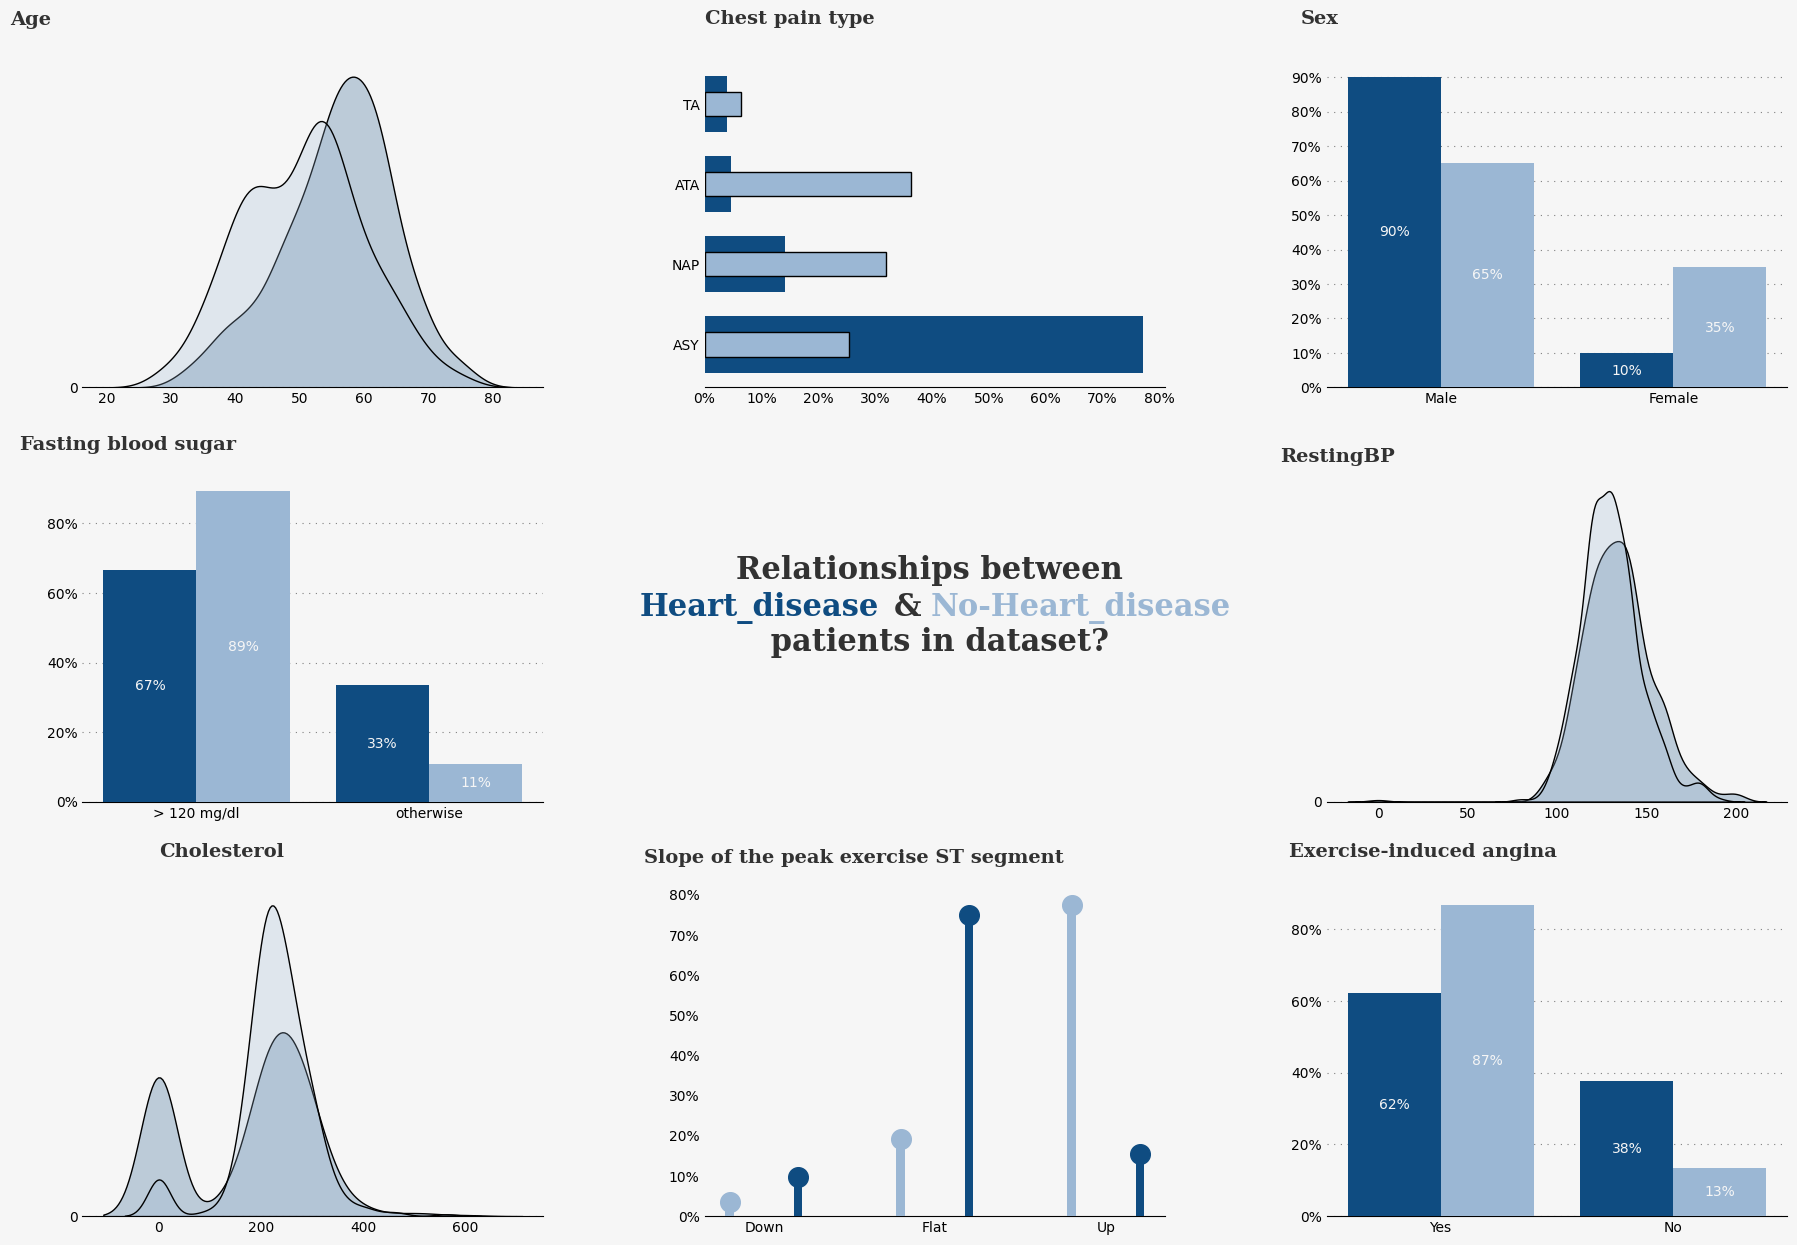

In [19]:
fig = plt.figure(figsize=(22,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color) # figure background color

# Plots

## Age
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(hd_yes["Age"])
negative = pd.DataFrame(hd_no["Age"])
sns.kdeplot(positive["Age"], ax=ax0,color="#0f4c81", fill=True, ec='black',label="positive")
sns.kdeplot(negative["Age"], ax=ax0, color="#9bb7d4", fill=True, ec='black',label="negative")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax0.set_ylabel('')    
ax0.set_xlabel('')
ax0.text(5, 0.0565, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

# ChestPainType
positive = pd.DataFrame(hd_yes["ChestPainType"].value_counts())
positive["Percentage"] = positive["count"].apply(lambda x: x/sum(positive["count"])*100)
negative = pd.DataFrame(hd_no["ChestPainType"].value_counts())
negative["Percentage"] = negative["count"].apply(lambda x: x/sum(negative["count"])*100)

ax1.text(0, 4, 'Chest pain type', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.barh(positive.index, positive['Percentage'], color="#0f4c81", zorder=3, height=0.7)
ax1.barh(negative.index, negative['Percentage'], color="#9bb7d4", zorder=3,ec='black', height=0.3)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))

# SEX 
positive = pd.DataFrame(hd_yes["Sex"].value_counts())
positive["Percentage"] = positive["count"].apply(lambda x: x/sum(positive["count"])*100)
negative = pd.DataFrame(hd_no["Sex"].value_counts())
negative["Percentage"] = negative["count"].apply(lambda x: x/sum(negative["count"])*100)

x = np.arange(len(positive))
ax2.text(-0.4, 105.5, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax2.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['Male','Female'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], positive["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

# FastingBS
positive = pd.DataFrame(hd_yes["FastingBS"].value_counts())
positive["Percentage"] = positive["count"].apply(lambda x: x/sum(positive["count"])*100)
negative = pd.DataFrame(hd_no["FastingBS"].value_counts())
negative["Percentage"] = negative["count"].apply(lambda x: x/sum(negative["count"])*100)

x = np.arange(len(positive))
ax3.text(-0.56, 101, 'Fasting blood sugar', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax3.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax3.set_xticks(x + 0.4 / 2)
ax3.set_xticklabels(['> 120 mg/dl','otherwise'])
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
    
## TITLE
ax4.spines["bottom"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.6, 'Relationships between \n\n patients in dataset?', horizontalalignment='center', verticalalignment='center',
         fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")

ax4.text(-0.14,0.57,"Heart_disease", fontweight="bold", fontfamily='serif', fontsize=22, color='#0f4c81')
ax4.text(0.41,0.57,"&", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax4.text(0.49,0.57,"No-Heart_disease", fontweight="bold", fontfamily='serif', fontsize=22, color='#9bb7d4')

# RestingBP
ax5.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(hd_yes["RestingBP"])
negative = pd.DataFrame(hd_no["RestingBP"])
sns.kdeplot(positive["RestingBP"], ax=ax5,color="#0f4c81",ec='black', fill=True, label="positive")
sns.kdeplot(negative["RestingBP"], ax=ax5, color="#9bb7d4", ec='black',fill=True, label="negative")
ax5.text(-55, 0.02755, 'RestingBP', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax5.set_ylabel('')    
ax5.set_xlabel('')

## Cholesterol  / MaxHR		
ax6.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(hd_yes["Cholesterol"])
negative = pd.DataFrame(hd_no["Cholesterol"])
sns.kdeplot(positive["Cholesterol"], ax=ax6,color="#0f4c81", ec='black',fill=True, label="positive")
sns.kdeplot(negative["Cholesterol"], ax=ax6, color="#9bb7d4",ec='black', fill=True, label="negative")
ax6.text(-0.06, 0.0085, 'Cholesterol', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax6.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax6.set_ylabel('')    
ax6.set_xlabel('')

# ST_Slope
positive = pd.DataFrame(hd_yes["ST_Slope"].value_counts())
positive["Percentage"] = positive["count"].apply(lambda x: x/sum(positive["count"])*100)
positive = positive.sort_index()

negative = pd.DataFrame(hd_no["ST_Slope"].value_counts())
negative["Percentage"] = negative["count"].apply(lambda x: x/sum(negative["count"])*100)
negative = negative.sort_index()

ax7.bar(negative.index, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.05)
ax7.scatter(negative.index, negative["Percentage"], zorder=3,s=200, color="#9bb7d4")
ax7.bar(np.arange(len(positive.index))+0.4, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.05)
ax7.scatter(np.arange(len(positive.index))+0.4, positive["Percentage"], zorder=3,s=200, color="#0f4c81")

ax7.yaxis.set_major_formatter(mtick.PercentFormatter())
ax7.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax7.set_xticks(np.arange(len(positive.index))+0.4 / 2)
ax7.set_xticklabels(list(positive.index),rotation=0)
ax7.text(-0.5, 88, 'Slope of the peak exercise ST segment', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

# ExerciseAngina
positive = pd.DataFrame(hd_yes["ExerciseAngina"].value_counts())
positive["Percentage"] = positive["count"].apply(lambda x: x/sum(positive["count"])*100)
negative = pd.DataFrame(hd_no["ExerciseAngina"].value_counts())
negative["Percentage"] = negative["count"].apply(lambda x: x/sum(negative["count"])*100)

x = np.arange(len(positive))
ax8.text(-0.45, 100, 'Exercise-induced angina', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax8.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax8.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax8.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax8.set_xticks(x + 0.4 / 2)
ax8.set_xticklabels(['Yes','No'])
ax8.yaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')


for s in ["top","right","left"]:
    for i in range(0,9):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,9):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].set_facecolor(background_color) 
        
plt.show()

#### Conclusions
It seems that Age is a significant factor in heart diseses - the older patient is the more at risk he is. 

Also many more men struggle with heart disease than women.

Patients heaving heart disese observed ASY (Asymptomatic) chest pain.

Some anomaly can be seen for Cholesterol plot, some values fluctuate around zero. 

The Examination of Age and Sex columns

In [20]:
# Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

The Examination of ChestPainType column

In [21]:
# value count of ChestPainType column
df['ChestPainType'].value_counts()
#ASY, ATA, NAP, TA = asymptomatic, atypical angina, non-anginal pain, typical angina

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

<Axes: xlabel='ChestPainType', ylabel='count'>

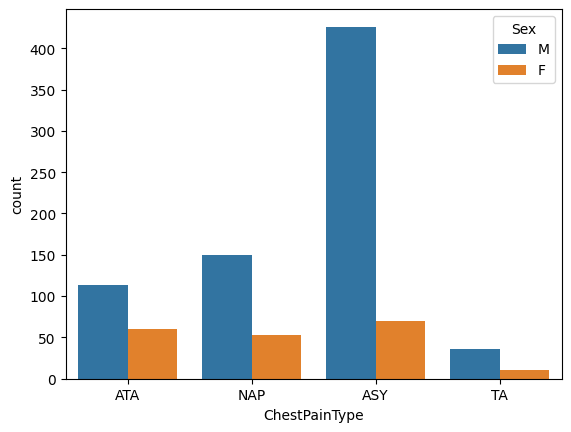

In [22]:
# count plot of cp column by sex column
sns.countplot(df, x='ChestPainType', hue= 'Sex')

In [23]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

Spliting Dataset into numeric & categoric features

In [24]:
# find Numerical Columns
#numerical= df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns
numerical= df.select_dtypes('number').columns
# find categorical Columns
categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')


Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


examine the correlation among variables using heatmap

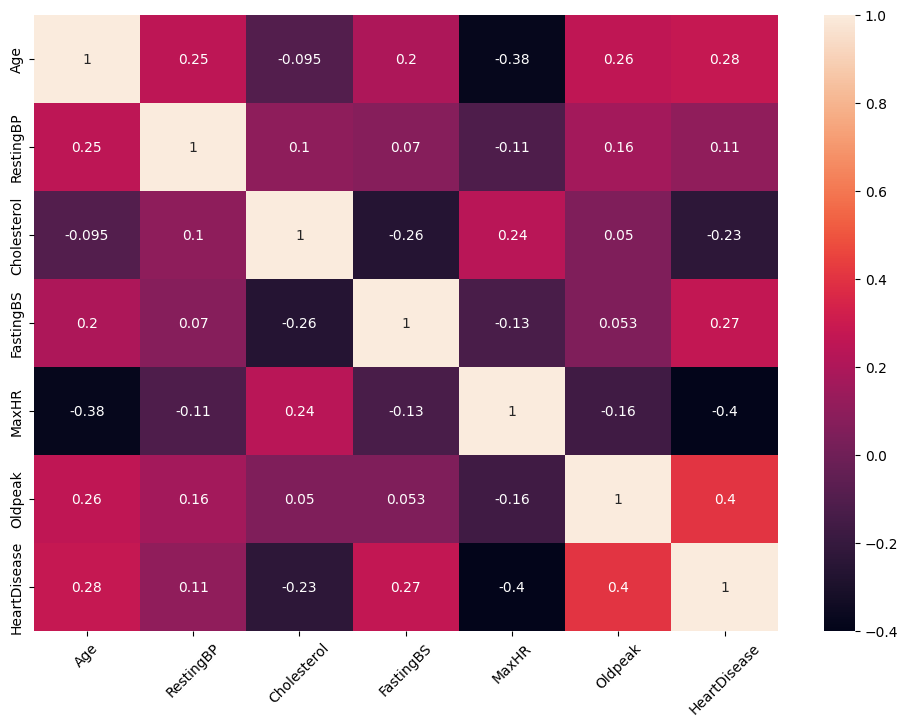

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[df[numerical].columns.tolist()].corr(), annot=True)
plt.xticks(rotation=45);

### b) Data Preprocessing

Handling Null Values

In [5]:
# sprawdzenie brakujących danych
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We do not have any missing data.

But Cholesterol column has 172 values = 0. We will replace 0 with a mean value of Cholesterol column 

In [6]:
#df['Cholesterol'].max(), df['Cholesterol'].min(), df['Cholesterol'].mean(), df['Cholesterol'].median()
df['Cholesterol'] = df['Cholesterol'].replace(0, (df['Cholesterol'].median()).astype(int))

In [7]:
df['Cholesterol'].value_counts()

Cholesterol
223    182
254     11
220     10
216      9
230      9
      ... 
347      1
365      1
412      1
491      1
131      1
Name: count, Length: 221, dtype: int64

### c) data division into training and test sets in the 80:20% ratio

In [8]:
# data division into attribute columns and target column
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [9]:
X.shape, y.shape

((918, 11), (918,))

### PODZIAŁ ZWYKŁY

In [10]:
#data division into training and test sets in the 80:20% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,M,NAP,120,240,1,Normal,194,N,0.8,Down
25,36,M,NAP,130,209,0,Normal,178,N,0.0,Up
84,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up
344,51,M,ASY,120,223,1,Normal,104,N,0.0,Flat
...,...,...,...,...,...,...,...,...,...,...,...
106,48,F,ASY,120,254,0,ST,110,N,0.0,Up
270,45,M,ASY,120,225,0,Normal,140,N,0.0,Up
860,60,M,ASY,130,253,0,Normal,144,Y,1.4,Up
435,60,M,ASY,152,223,0,ST,118,Y,0.0,Up


In [11]:
X_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
668,63,F,ATA,140,195,0,Normal,179,N,0.0,Up
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat
377,65,M,ASY,160,223,1,ST,122,N,1.2,Flat
535,56,M,ASY,130,223,0,LVH,122,Y,1.0,Flat
807,54,M,ATA,108,309,0,Normal,156,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
211,50,F,NAP,140,288,0,Normal,140,Y,0.0,Flat
745,63,F,ASY,108,269,0,Normal,169,Y,1.8,Flat
584,64,M,ASY,141,244,1,ST,116,Y,1.5,Flat
878,49,M,ATA,130,266,0,Normal,171,N,0.6,Up


In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((734, 11), (734,), (184, 11), (184,))

In [34]:
# sprawdzenie poprawnosci podziału
assert len(X_test) == len(y_test)

In [35]:
assert len(X_train) == len(y_train)

In [13]:
y_train.value_counts(), y_test.value_counts()

(HeartDisease
 1    401
 0    333
 Name: count, dtype: int64,
 HeartDisease
 1    107
 0     77
 Name: count, dtype: int64)

### PODZIAŁ WARSTWOWY

In [37]:
splitter = StratifiedShuffleSplit(test_size=.2, random_state=42)

for train_idx, test_idx in splitter.split(X, y):
    X_train_w = X.iloc[train_idx]
    y_train_w = y.iloc[train_idx]
    X_test_w = X.iloc[test_idx]
    y_test_w = y.iloc[test_idx]

X_train_w.shape,X_test_w.shape ,y_train_w.shape,y_test_w.shape

((734, 11), (184, 11), (734,), (184,))

In [38]:
y_train_w.value_counts(),y_test_w.value_counts()

(HeartDisease
 1    406
 0    328
 Name: count, dtype: int64,
 HeartDisease
 1    102
 0     82
 Name: count, dtype: int64)

#### histogram prezentujący rozkład liczebności wartości atrybutu decyzyjnego (kolumna stroke) w podzbiorze treningowym i testowym

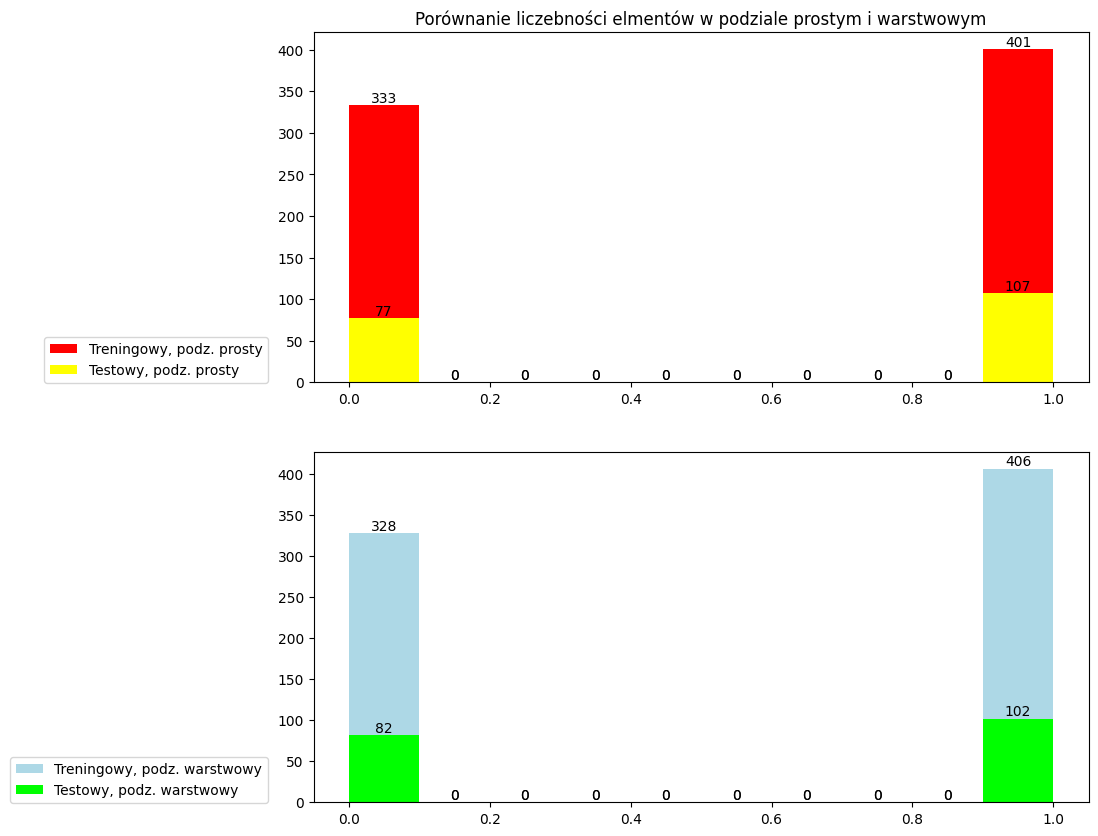

In [39]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].hist(y_train, label='Treningowy, podz. prosty', color='red')
ax[0].hist(y_test, label='Testowy, podz. prosty', color='yellow')
ax[0].legend(loc='best', bbox_to_anchor=(-0.05, 0.15))
for count in ax[0].containers:
    ax[0].bar_label(count)
ax[1].hist(y_train_w, label='Treningowy, podz. warstwowy', color='lightblue')
ax[1].hist(y_test_w, label='Testowy, podz. warstwowy', color='lime')
ax[1].legend(loc='best', bbox_to_anchor=(-0.05, 0.15))
for count in ax[1].containers:
    ax[1].bar_label(count)
ax[0].set_title('Porównanie liczebności elmentów w podziale prostym i warstwowym')
plt.show()

### atrybuty nienumeryczne/ kategorialne i atrybuty numeryczne

### Pipelines

In [14]:
num_attr_pipeline = Pipeline([
    ('scale_values', MinMaxScaler(feature_range=(0,1))),
])

cat_attr_pipeline = Pipeline([
    ('encode_cat_values', OneHotEncoder()),
])

preprocessing_pipeline = ColumnTransformer([
    ('num_attr', num_attr_pipeline, X.select_dtypes('number').columns),
    ('cat_attr', cat_attr_pipeline, X.select_dtypes('object').columns),
])

In [15]:
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_train_preprocessed

array([[0.27083333, 0.6       , 0.2992278 , ..., 1.        , 0.        ,
        0.        ],
       [0.14583333, 0.65      , 0.23938224, ..., 0.        , 0.        ,
        1.        ],
       [0.5625    , 0.75      , 0.24710425, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.64583333, 0.65      , 0.32432432, ..., 0.        , 0.        ,
        1.        ],
       [0.64583333, 0.76      , 0.26640927, ..., 0.        , 0.        ,
        1.        ],
       [0.22916667, 0.75      , 0.59266409, ..., 0.        , 1.        ,
        0.        ]])

In [16]:
X_test_preprocessed = preprocessing_pipeline.transform(X_test)
X_test_preprocessed

array([[0.70833333, 0.7       , 0.21235521, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.725     , 0.83590734, ..., 0.        , 1.        ,
        0.        ],
       [0.75      , 0.8       , 0.26640927, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.72916667, 0.705     , 0.30694981, ..., 0.        , 1.        ,
        0.        ],
       [0.41666667, 0.65      , 0.34942085, ..., 0.        , 0.        ,
        1.        ],
       [0.72916667, 0.72      , 0.26640927, ..., 0.        , 1.        ,
        0.        ]])

In [17]:
X_train_preprocessed = pd.DataFrame(
    X_train_preprocessed,
    columns=preprocessing_pipeline.get_feature_names_out(),
    index=X_train.index,
)
X_train_preprocessed

,num_attr__Age,num_attr__RestingBP,num_attr__Cholesterol,num_attr__FastingBS,num_attr__MaxHR,num_attr__Oldpeak,cat_attr__Sex_F,cat_attr__Sex_M,cat_attr__ChestPainType_ASY,cat_attr__ChestPainType_ATA,cat_attr__ChestPainType_NAP,cat_attr__ChestPainType_TA,cat_attr__RestingECG_LVH,cat_attr__RestingECG_Normal,cat_attr__RestingECG_ST,cat_attr__ExerciseAngina_N,cat_attr__ExerciseAngina_Y,cat_attr__ST_Slope_Down,cat_attr__ST_Slope_Flat,cat_attr__ST_Slope_Up
795,0.270833,0.60,0.299228,1.0,0.943662,0.386364,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
25,0.145833,0.65,0.239382,0.0,0.830986,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
84,0.562500,0.75,0.247104,1.0,0.457746,0.409091,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
10,0.166667,0.65,0.243243,0.0,0.577465,0.295455,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
344,0.458333,0.60,0.266409,1.0,0.309859,0.295455,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.395833,0.60,0.326255,0.0,0.352113,0.295455,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
270,0.333333,0.60,0.270270,0.0,0.563380,0.295455,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
860,0.645833,0.65,0.324324,0.0,0.591549,0.454545,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
435,0.645833,0.76,0.266409,0.0,0.408451,0.295455,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [18]:
X_test_preprocessed = pd.DataFrame(
    X_test_preprocessed,
    columns=preprocessing_pipeline.get_feature_names_out(),
    index=X_test.index,
)
X_test_preprocessed

,num_attr__Age,num_attr__RestingBP,num_attr__Cholesterol,num_attr__FastingBS,num_attr__MaxHR,num_attr__Oldpeak,cat_attr__Sex_F,cat_attr__Sex_M,cat_attr__ChestPainType_ASY,cat_attr__ChestPainType_ATA,cat_attr__ChestPainType_NAP,cat_attr__ChestPainType_TA,cat_attr__RestingECG_LVH,cat_attr__RestingECG_Normal,cat_attr__RestingECG_ST,cat_attr__ExerciseAngina_N,cat_attr__ExerciseAngina_Y,cat_attr__ST_Slope_Down,cat_attr__ST_Slope_Flat,cat_attr__ST_Slope_Up
668,0.708333,0.700,0.212355,0.0,0.838028,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
30,0.500000,0.725,0.835907,0.0,0.492958,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
377,0.750000,0.800,0.266409,1.0,0.436620,0.431818,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
535,0.562500,0.650,0.266409,0.0,0.436620,0.409091,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
807,0.520833,0.540,0.432432,0.0,0.676056,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.437500,0.700,0.391892,0.0,0.563380,0.295455,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
745,0.708333,0.540,0.355212,0.0,0.767606,0.500000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
584,0.729167,0.705,0.306950,1.0,0.394366,0.465909,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
878,0.416667,0.650,0.349421,0.0,0.781690,0.363636,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [45]:
X_train_preprocessed['cat_attr__Sex_F'].min(), X_train_preprocessed['cat_attr__Sex_F'].max()

(0.0, 1.0)

In [19]:
X_train_preprocessed.shape, y_train.shape, X_test_preprocessed.shape, y_test.shape

((734, 20), (734,), (184, 20), (184,))

In [47]:
# sprawdzenie poprawnosci podziału
assert len(X_test_preprocessed) == len(y_test)

In [48]:
assert len(X_train_preprocessed) == len(y_train)

### Redukcja wymiarowości danych PCA

In [20]:
pca = PCA(n_components=0.999)
X_train_reduced = pca.fit_transform(X_train_preprocessed)
X_train_reduced

array([[ 5.60602259e-01, -4.09693699e-01, -1.04932276e-01, ...,
        -6.11453872e-02,  9.49430579e-02, -1.63925592e-02],
       [ 1.09786889e+00, -5.37951121e-01, -2.38721818e-01, ...,
        -4.45809253e-03, -7.71530751e-03, -5.66673322e-02],
       [-1.21031358e+00, -5.59185150e-01,  1.58357214e-01, ...,
        -4.34453192e-02, -2.20194187e-02, -8.30122184e-02],
       ...,
       [-3.22608761e-01, -7.30726238e-01, -4.33384502e-01, ...,
         5.61684753e-04, -6.15413007e-03,  5.32436342e-02],
       [-5.10143587e-01,  2.73137663e-01, -1.03379764e+00, ...,
        -8.43098310e-02,  5.14382557e-02, -7.83977872e-02],
       [ 1.43607677e-01,  8.83765783e-02,  1.22749283e+00, ...,
         3.29446351e-01,  1.18020550e-01, -3.58068320e-02]])

In [21]:
X_train_reduced.shape

(734, 15)

In [51]:
pca.n_components_

15

In [52]:
np.cumsum(pca.explained_variance_ratio_)[-1]

1.0

In [53]:
pca.explained_variance_ratio_

array([0.30602087, 0.12854005, 0.11354672, 0.10186482, 0.08497232,
       0.07047313, 0.06114759, 0.05538026, 0.03065771, 0.01898827,
       0.01272122, 0.00648882, 0.00349341, 0.00318284, 0.00252198])

In [22]:
X_test_reduced = pca.transform(X_test_preprocessed)
X_test_reduced

array([[ 1.53298024, -0.0286788 ,  0.6185133 , ..., -0.15499268,
        -0.03513239, -0.05469901],
       [ 0.24911815, -0.36306448,  0.48439914, ...,  0.30222293,
         0.49676202,  0.06203598],
       [-0.52750752,  0.56361766, -0.50691639, ...,  0.0217181 ,
        -0.01349736, -0.09747883],
       ...,
       [-1.40928034,  0.46104251, -0.44007516, ..., -0.00656992,
        -0.00315262,  0.01587977],
       [ 1.18165599, -0.63879181, -0.36761612, ...,  0.04039235,
         0.02585312,  0.01609979],
       [-1.30583952,  0.42825155, -0.31362768, ..., -0.09639633,
         0.02578555, -0.02529345]])

In [23]:
X_train_reduced.shape, X_test_reduced.shape

((734, 15), (184, 15))

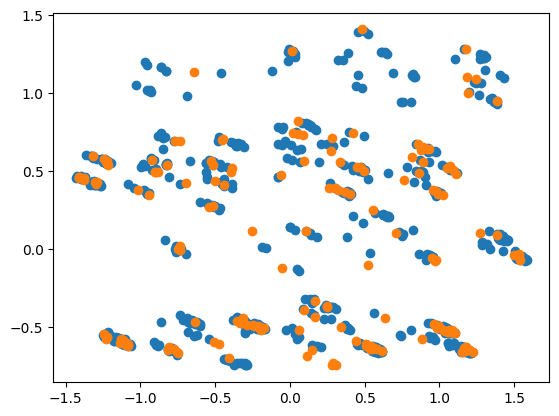

In [56]:
plt.scatter(x=X_train_reduced[:, 0], y=X_train_reduced[:,1])
plt.scatter(x=X_test_reduced[:, 0], y=X_test_reduced[:,1])

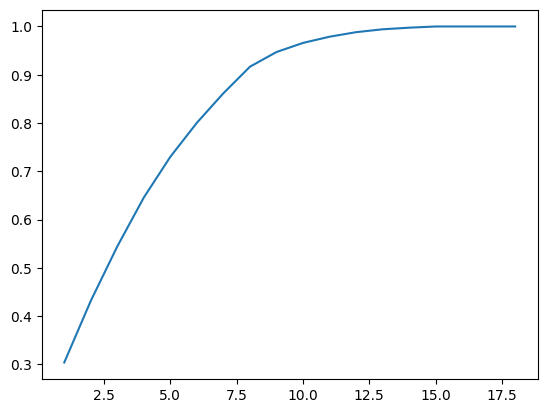

In [45]:
components = np.arange(1, X_train_preprocessed.shape[1] - 1)
variance = []

for i in components:
    pca = PCA(n_components=i)
    pca.fit_transform(X_train_preprocessed)
    variance.append(np.cumsum(pca.explained_variance_ratio_)[-1])

plt.plot(components, variance)


### UCZENIE NADZOROWANE

### K-NN

In [38]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_reduced, y_train)

KNeighborsClassifier()

In [39]:
y_pred_knn = model_knn.predict(X_test_reduced)
y_pred_knn

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [40]:
asc = accuracy_score(y_test, y_pred_knn)
basc = balanced_accuracy_score(y_test, y_pred_knn)
f'accuracy_score: {asc}, balanced_accuracy_score: {basc}'

'accuracy_score: 0.8315217391304348, balanced_accuracy_score: 0.835113484646195'

In [41]:
confusion_matrix(y_test, y_pred_knn)

array([[66, 11],
       [20, 87]], dtype=int64)

In [42]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
tn, fp, fn, tp

(66, 11, 20, 87)

In [43]:
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
global_accuracy = (tp + tn) / (tn + fp + fn + tp)

f'Precision: {precision}, sensitivity: {sensitivity}, specificity: {specificity}, accuracy {global_accuracy}'

'Precision: 0.8877551020408163, sensitivity: 0.8130841121495327, specificity: 0.8571428571428571, accuracy 0.8315217391304348'

<Figure size 1800x800 with 0 Axes>

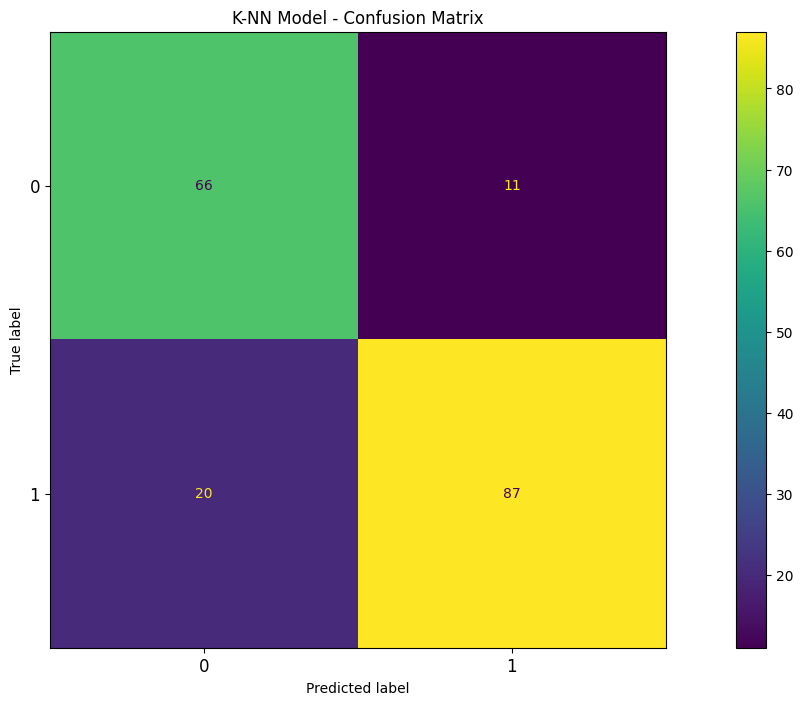

In [44]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure()
ConfusionMatrixDisplay(cm, display_labels=["0","1"]).plot()
plt.title("K-NN Model - Confusion Matrix")
plt.xticks(range(2), ["0","1"], fontsize=12)
plt.yticks(range(2), ["0","1"], fontsize=12)
plt.show()

In [45]:
scores_knn = cross_val_score(model_knn, X_train_reduced, y_train, cv=5)
scores_knn

array([0.8707483 , 0.87755102, 0.85034014, 0.80952381, 0.82876712])

In [46]:
mean = scores_knn.mean()
std = scores_knn.std()

f'Srednia: {mean}, odch. std.: {std}'

'Srednia: 0.8473860777187585, odch. std.: 0.025474145493859148'

In [47]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        77
           1       0.89      0.81      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.83      0.83       184



### DRZEWO DECYZYJNE

In [67]:
model_dd = DecisionTreeClassifier(criterion = 'entropy', random_state=42, max_leaf_nodes=5)
model_dd.fit(X_train_reduced, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=42)

In [68]:
y_pred_dd = model_dd.predict(X_test_reduced)
y_pred_dd

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [69]:
asc = accuracy_score(y_test, y_pred_dd)
basc = balanced_accuracy_score(y_test, y_pred_dd)
f'accuracy_score: {asc}, balanced_accuracy_score: {basc}'

'accuracy_score: 0.842391304347826, balanced_accuracy_score: 0.8371768418497391'

In [70]:
confusion_matrix(y_test, y_pred_dd)

array([[62, 15],
       [14, 93]], dtype=int64)

In [71]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dd).ravel()
tn, fp, fn, tp

(62, 15, 14, 93)

In [72]:
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
global_accuracy = (tp + tn) / (tn + fp + fn + tp)

f'Precision: {precision}, sensitivity: {sensitivity}, specificity: {specificity}, accuracy {global_accuracy}'

'Precision: 0.8611111111111112, sensitivity: 0.8691588785046729, specificity: 0.8051948051948052, accuracy 0.842391304347826'

<Figure size 640x480 with 0 Axes>

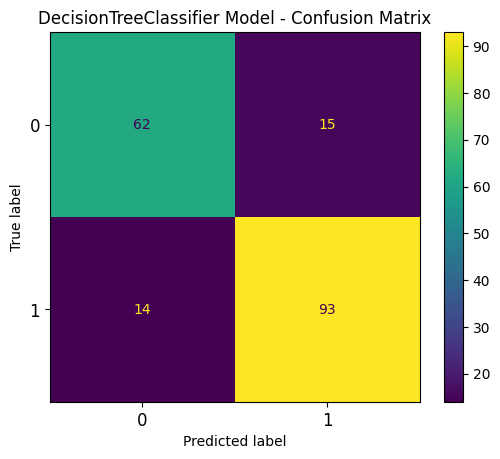

In [73]:
cm = confusion_matrix(y_test, y_pred_dd)
plt.figure()
ConfusionMatrixDisplay(cm, display_labels=["0","1"]).plot()
plt.title("DecisionTreeClassifier Model - Confusion Matrix")
plt.xticks(range(2), ["0","1"], fontsize=12)
plt.yticks(range(2), ["0","1"], fontsize=12)
plt.show()

In [74]:
scores_dd = cross_val_score(model_dd, X_train_reduced, y_train, cv=5)
scores_dd

array([0.86394558, 0.8707483 , 0.84353741, 0.85034014, 0.83561644])

In [75]:
mean = scores_dd.mean()
std = scores_dd.std()

f'Srednia: {mean}, odch. std.: {std}'

'Srednia: 0.8528375733855185, odch. std.: 0.012911076691697667'

In [76]:
print(classification_report(y_test, y_pred_dd))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        77
           1       0.86      0.87      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



### REGRESJA LOGISTYCZNA

In [77]:
model_lr = LogisticRegression(random_state=42, class_weight=None, solver='liblinear',max_iter=1000)
model_lr.fit(X_train_reduced, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [78]:
y_pred_lr = model_lr.predict(X_test_reduced)

In [79]:
asc = accuracy_score(y_test, y_pred_lr)
basc = balanced_accuracy_score(y_test, y_pred_lr)
f'accuracy_score: {asc}, balanced_accuracy_score: {basc}'

'accuracy_score: 0.8586956521739131, balanced_accuracy_score: 0.8602985799247481'

In [80]:
# MACIERZ POMYŁEK
confusion_matrix(y_test, y_pred_lr)

array([[67, 10],
       [16, 91]], dtype=int64)

In [81]:
# tn - true negative
# fp - false positive
# fn - false negative
# tp - true positive
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
tn, fp, fn, tp

(67, 10, 16, 91)

In [82]:
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
global_accuracy = (tp + tn) / (tn + fp + fn + tp)

In [197]:
f'Precision: {precision}, sensitivity: {sensitivity}, specificity: {specificity}, accuracy {global_accuracy}'

'Precision: 0.900990099009901, sensitivity: 0.8504672897196262, specificity: 0.8701298701298701, accuracy 0.8586956521739131'

<Figure size 640x480 with 0 Axes>

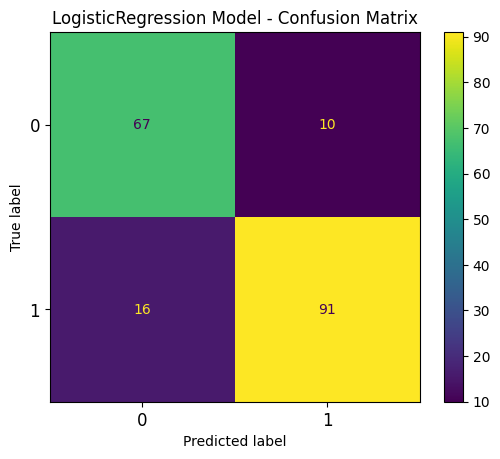

In [83]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure()
ConfusionMatrixDisplay(cm, display_labels=["0","1"]).plot()
plt.title("LogisticRegression Model - Confusion Matrix")
plt.xticks(range(2), ["0","1"], fontsize=12)
plt.yticks(range(2), ["0","1"], fontsize=12)
plt.show()

In [84]:
scores_lr = cross_val_score(model_lr, X_train_reduced, y_train, cv=5)
scores_lr

array([0.8707483 , 0.8707483 , 0.85034014, 0.83673469, 0.83561644])

In [85]:
mean = scores_lr.mean()
std = scores_lr.std()

f'Srednia: {mean}, odch. std.: {std}'

'Srednia: 0.8528375733855187, odch. std.: 0.015515770173283955'

In [86]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



### Support Vector Machine

In [87]:
model_svm = SVC(random_state=42)
model_svm.fit(X_train_reduced, y_train)

SVC(random_state=42)

In [88]:
y_pred_svm = model_svm.predict(X_test_reduced)

In [89]:
scores_svm = cross_val_score(model_svm, X_train_reduced, y_train, cv=5)
mean = scores_svm.mean()
std = scores_svm.std()

f'Srednia: {mean}, odch. std.: {std}'

'Srednia: 0.8596309756779423, odch. std.: 0.024095523468566367'

### Random Forest

In [90]:
model_rf = RandomForestClassifier(max_depth=20, random_state=42, min_samples_split=10, n_estimators=100)
model_rf.fit(X_train_reduced, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, random_state=42)

In [91]:
y_pred_rf = model_rf.predict(X_test_reduced)

In [92]:
scores_rf = cross_val_score(model_rf, X_train_reduced, y_train, cv=5)
mean = scores_rf.mean()
std = scores_rf.std()

f'Srednia: {mean}, odch. std.: {std}'

'Srednia: 0.8569192060385799, odch. std.: 0.0152137557480295'

### MEASURES COMPARISON

In [93]:
# Make dataframes to plot

knn_df = pd.DataFrame(data=[f1_score(y_test,y_pred_knn),accuracy_score(y_test, y_pred_knn), recall_score(y_test, y_pred_knn),
                   precision_score(y_test, y_pred_knn), roc_auc_score(y_test, y_pred_knn), scores_knn.mean()], 
             columns=['K-NN Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score", "Cross_val Score"])

dd_df = pd.DataFrame(data=[f1_score(y_test,y_pred_dd),accuracy_score(y_test, y_pred_dd), recall_score(y_test, y_pred_dd),
                   precision_score(y_test, y_pred_dd), roc_auc_score(y_test, y_pred_dd), scores_dd.mean()], 
             columns=['Decision Tree Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score", "Cross_val Score"])

lr_df = pd.DataFrame(data=[f1_score(y_test,y_pred_lr),accuracy_score(y_test, y_pred_lr), recall_score(y_test, y_pred_lr),
                   precision_score(y_test, y_pred_lr), roc_auc_score(y_test, y_pred_lr), scores_lr.mean()], 
             columns=['Logistic Regression Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score", "Cross_val Score"])

svm_df = pd.DataFrame(data=[f1_score(y_test,y_pred_svm),accuracy_score(y_test, y_pred_svm), recall_score(y_test, y_pred_svm),
                   precision_score(y_test, y_pred_svm), roc_auc_score(y_test, y_pred_svm), scores_svm.mean()], 
             columns=['Support Vector Machine (SVM) Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score", "Cross_val Score"])

rf_df = pd.DataFrame(data=[f1_score(y_test,y_pred_rf),accuracy_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf),
                   precision_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_rf), scores_rf.mean()], 
             columns=['Random Forest Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score", "Cross_val Score"])

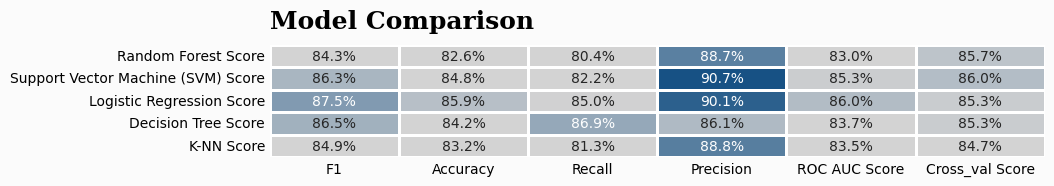

In [94]:
df_models = round(pd.concat([rf_df,svm_df,lr_df,dd_df,knn_df], axis=1),5)
import matplotlib
colors = ["lightgray","lightgray","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,8)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",cbar=False,linewidths=0.8,annot_kws={"fontsize":10},vmin=0.79,vmax=0.91)
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-0.75,'Model Comparison',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

### BEST MODEL FINDING FUNCTION

In [95]:
# create a list of models to evaluate
models = [
    ('KNeighbors Classifier', KNeighborsClassifier(n_neighbors=5)),
    ('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=5, random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)),
    ('Line Vector Machine', LinearSVC(dual="auto", random_state=0, tol=1e-5)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Random Forest', RandomForestClassifier(max_depth=20, random_state=42, min_samples_split=10, n_estimators=100)),
]

In [96]:
def find_best_model(X_train, y_train, X_test, y_test):
    best_model = None
    best_accuracy = 0.0

    #Iterate over the models and evaluate their performance
    for name, model in models:
        #create a pipeline for each model
        pipeline = Pipeline([
            ('model', model)
        ])
        
        # perform cross validation
        scores = cross_val_score(pipeline, X_train, y_train, cv=5)
        
        # Calculate mean accuracy and standard deviation
        mean_accuracy = scores.mean()
        std = scores.std()
        
        #fit the pipeline on the training data
        pipeline.fit(X_train, y_train)
        
        # make prediction on the test data
        y_pred = pipeline.predict(X_test)
        
        #Calculate accuracy score and balanced accuracy
        accuracy = accuracy_score(y_test, y_pred)
        balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
        
        #print the performance metrics
        print("Model", name)
        print("Cross Validatino accuracy: ", mean_accuracy, " with standard deviation:", std)
        print("Test Accuracy: ", accuracy)
        print("Balanced Accuracy: ", balanced_accuracy)
        print()
        
        #Check if the current model has the best accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = name
        
    # Retrieve the best model
    print("Best Model: ", best_model)

In [97]:
find_best_model(X_train_reduced, y_train, X_test_reduced, y_test)

Model KNeighbors Classifier
Cross Validatino accuracy:  0.8473860777187585  with standard deviation: 0.025474145493859148
Test Accuracy:  0.8315217391304348
Balanced Accuracy:  0.835113484646195

Model Decision Tree Classifier
Cross Validatino accuracy:  0.8528375733855185  with standard deviation: 0.012911076691697667
Test Accuracy:  0.842391304347826
Balanced Accuracy:  0.8371768418497391

Model Logistic Regression
Cross Validatino accuracy:  0.8528375733855187  with standard deviation: 0.015515770173283955
Test Accuracy:  0.8586956521739131
Balanced Accuracy:  0.8602985799247481

Model Line Vector Machine
Cross Validatino accuracy:  0.8541981176032056  with standard deviation: 0.017759248892755708
Test Accuracy:  0.8641304347826086
Balanced Accuracy:  0.8667920864182546

Model Support Vector Machine
Cross Validatino accuracy:  0.8596309756779423  with standard deviation: 0.024095523468566367
Test Accuracy:  0.8478260869565217
Balanced Accuracy:  0.8527733948294696

Model Random Fore

### HYPERPARAMETER TUNING ###

In [98]:
# Define models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

In [99]:
def hyperparameter_tuning(X_train, y_train, X_test, y_test, models):
    # Define dictionary to store results
    results = {}
    
    # Perform hyperparameter tuning for each model
    for model_name, model in models.items():
    # Define parameter grid for hyperparameter tuning
        param_grid = {}
        if model_name == 'Logistic Regression':
            param_grid = {'C': [0.1, 1, 10, 100]}
        elif model_name == 'KNN':
            param_grid = {'n_neighbors': [3, 5, 7, 9]}
        elif model_name == 'SVM':
            param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}
        elif model_name == 'Decision Tree':
            param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'criterion': ('gini', 'entropy'), 'max_leaf_nodes': (None, 5, 10, 15)}
        elif model_name == 'Random Forest':
            param_grid = {'n_estimators': (100, 200, 300), 'max_depth': (None, 10, 20, 30), 'min_samples_split': (2, 5, 10), 'max_features': ('log2', 'sqrt', None)}


        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=10,)
        grid_search.fit(X_train, y_train)
        
        # Get best hyperparameters and evaluate on test set
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results in dictionary
        results[model_name] = {'best_params': best_params, 'accuracy': accuracy}
    
    return results

In [100]:
results = hyperparameter_tuning(X_train_reduced, y_train, X_test_reduced, y_test, models)
print(results)
for model_name, result in results.items():
    print("Model:", model_name)
    print("Best hyperparameters:", result['best_params'])
    print("Accuracy:", result['accuracy'])
    print()

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'Logistic Regression': {'best_params': {'C': 0.1}, 'accuracy': 0.8478260869565217}, 'KNN': {'best_params': {'n_neighbors': 9}, 'accuracy': 0.842391304347826}, 'SVM': {'best_params': {'C': 1, 'gamma': 0.1}, 'accuracy': 0.8206521739130435}, 'Decision Tree': {'best_params': {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': 5, 'min_samples_split': 2}, 'accuracy': 0.842391304347826}, 'Random Forest': {'best_params': {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 300}, 'accuracy': 0.8369565217391305}}
Model: Logistic Regression
Best hyperparameters: {'C': 0.1}
Accuracy: 0.8478260869565217

Model: KNN
Best hyperparameters: {'n_neighbors': 9}


### Artificial Neural Network (ANN) 

In [24]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Input

In [25]:
tf.random.set_seed(42)

In [26]:
model = tf.keras.Sequential([
    Input(shape=(X_train_reduced.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [27]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=[
        'accuracy',
        'precision',
        'recall',
    ],
)

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

### training the model

In [30]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)

In [31]:
history = model.fit(X_train_reduced, y_train, epochs=100, batch_size=64,callbacks=[early_stopping], validation_data=(X_test_reduced, y_test))

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4104 - loss: 0.7310 - precision: 0.4550 - recall: 0.1395 - val_accuracy: 0.5435 - val_loss: 0.6855 - val_precision: 0.8108 - val_recall: 0.2804
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6139 - loss: 0.6728 - precision: 0.8238 - recall: 0.4188 - val_accuracy: 0.7120 - val_loss: 0.6395 - val_precision: 0.8971 - val_recall: 0.5701
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7629 - loss: 0.6240 - precision: 0.8672 - recall: 0.6942 - val_accuracy: 0.7935 - val_loss: 0.5986 - val_precision: 0.9157 - val_recall: 0.7103
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8004 - loss: 0.5791 - precision: 0.8777 - recall: 0.7589 - val_accuracy: 0.7989 - val_loss: 0.5618 - val_precision: 0.8889 - val_recall: 0.7477
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8269 - loss: 0.5363 - precision: 0.8817 - recall: 0.8068 - val_accuracy: 0.7989 - val_loss: 0.5267

In [32]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test_reduced, y_test)
print(f'Test Loss: {test_loss:.3f}')
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8753 - loss: 0.3246 - precision: 0.8916 - recall: 0.8934 
Test Loss: 0.336
Test Accuracy: 86.96%


### Visualization of training effects

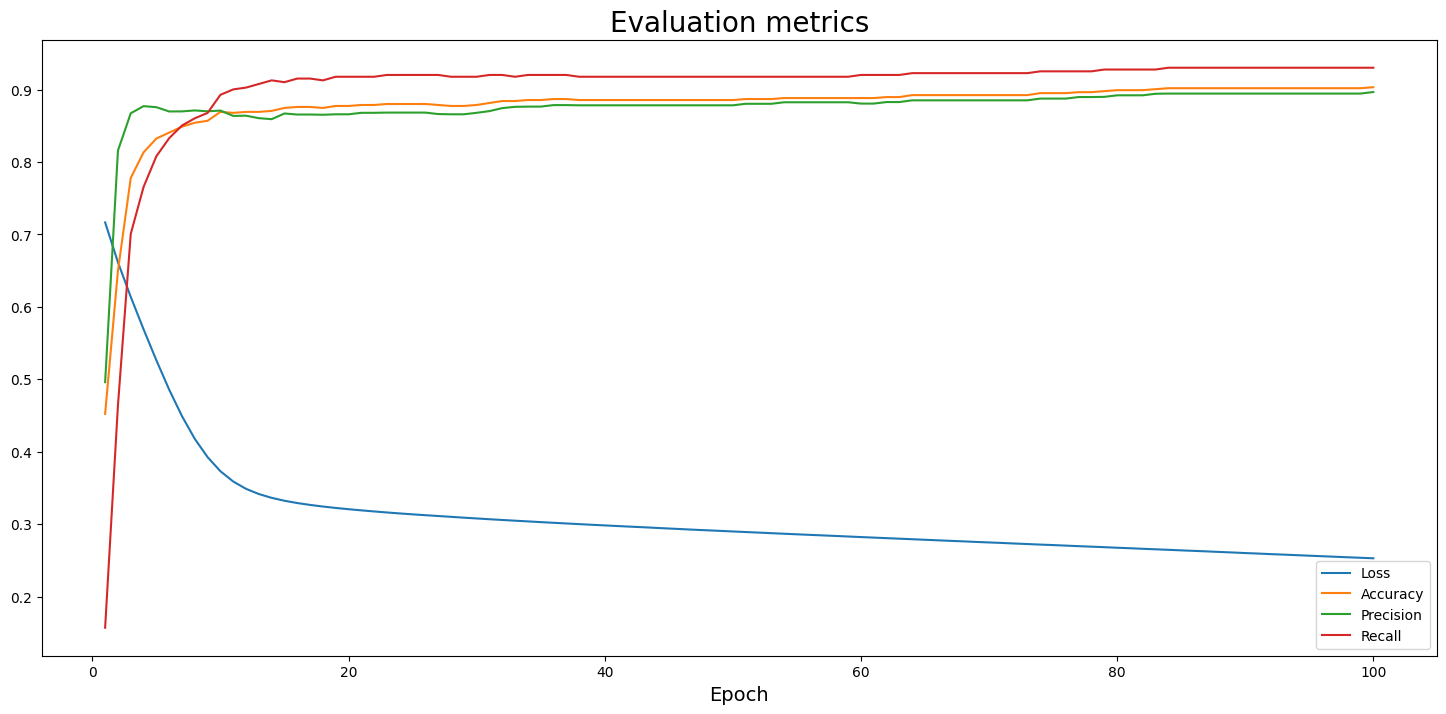

In [33]:
rcParams['figure.figsize'] = (18, 8)

plt.plot(
    np.arange(1, 101),
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101),
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101),
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101),
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()